# Open the small file (256x256x3) & store as .h5



In [1]:
from PIL import Image
import os, os.path
import csv
from matplotlib.pyplot import imshow
import numpy as np
import h5py
%matplotlib inline

In [8]:
# This is a homework need to implement yourself, it will take at least 4-5 hours if you are beginner 
# And please using the small dir to test before process large directory

def process_image(inputDir, outputDir):
    seq = 0
    valid_images = [".jpg",".jpeg"]
    for f in os.listdir(inputDir):
        # find all the files with .jpg,.png,.jpeg......
        ext = os.path.splitext(f)[1]
        if ext.lower() not in valid_images:
            continue
                
        # open files......
        im = Image.open(os.path.join(inputDir,f)) 
        width, height = im.size    
                
        # crop 
        if(width>height):
            small = im.crop((0,0,height,height))
        elif(width<height):
            small = im.crop((0,0,width,width))
        else:
            small = im
        # resize
        small = small.resize((256,256))
        #imshow(np.asarray(small))
        
        
        # save to outputDir
        seq+=1
        small.save(os.path.join(outputDir,"small_"+str(seq)+ext))
    print("total",seq,"files saved.")         


In [ ]:
process_image("./images/hellokitty","./images/small/hellokitty")


In [9]:
process_image("./images/not_hellokitty","./images/small/not_hellokitty")


total 76 files saved.


# Store

using h5py to store your file

In [6]:
import h5py

def h5store(inputDir,outputFileName):
    arr = []
    
    if os.path.exists(outputFileName):
        os.remove(outputFileName)

    
    hf = h5py.File(outputFileName, 'w')

    try:    
        for f in os.listdir(inputDir):
            im = Image.open(os.path.join(inputDir,f)) 
            #print(np.asarray(im).shape)
            arr.append(np.asarray(im))
        
        
        hellokittys = np.array(arr)
        hf.create_dataset('dataset_1', data=hellokittys,compression="gzip", compression_opts=9)        
    finally:
        hf.close()
        
        
    #print the result    
    print(hellokittys.shape)

In [7]:
h5store("./images/small/hellokitty",'datatest1.h5')


(97, 256, 256, 3)


In [10]:
h5store("./images/small/not_hellokitty",'datatest2.h5')

(76, 256, 256, 3)


In [8]:
hf = h5py.File('datatest1.h5', 'r')
n1 = hf.get('dataset_1')
n1 = np.array(n1)
print(n1.shape)

hf.close()

(97, 256, 256, 3)


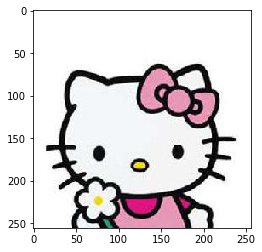

In [13]:
imshow(n1[53])